# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc , roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from tqdm import tqdm_notebook as tqdm
import os
import pickle

<h1>1. DATA</h1>

In [2]:
data_projects = pd.read_csv('../Datasets/donor_choose_train_data.csv')
data_resources = pd.read_csv('../Datasets/donor_choose_resources.csv')

In [3]:
print("Shape of training dataset =",data_projects.shape)
print("Shape of resources dataset =",data_resources.shape)

Shape of training dataset = (109248, 17)
Shape of resources dataset = (1541272, 4)


In [4]:
print("Columns in train dataset = ",data_projects.columns)
print("*"*50)
print("Columns in resources dataset = ",data_resources.columns)


Columns in train dataset =  Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
**************************************************
Columns in resources dataset =  Index(['id', 'description', 'quantity', 'price'], dtype='object')


<h2>1.1 Converting Date time format and sorting Data by Date</h2>

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(data_projects.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
data_projects['Date'] = pd.to_datetime(data_projects['project_submitted_datetime'])
data_projects.drop('project_submitted_datetime', axis=1, inplace=True)
data_projects.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
data_projects = data_projects[cols]


data_projects.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [6]:
output_value_counts = data_projects['project_is_approved'].value_counts()
output_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

<h1>2. PREPROCESSING</h1>

In [7]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


<h2>2.1 Project Categories</h2>

In [9]:
cats = list(data_projects['project_subject_categories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)

data_projects["clean_categories"] = category_list
data_projects.drop(["project_subject_categories"], axis = 1, inplace = True)

#preprocessing
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_coll = Counter()
for x in data_projects['clean_categories'].values:
    my_coll.update(x.split())
    
my_coll = dict(my_coll)
print(my_coll)
sorted_coll_dict = dict(sorted(my_coll.items(), key=lambda x: x[1]))
print((sorted_coll_dict))

{'Math_Science': 41421, 'SpecialNeeds': 13642, 'Literacy_Language': 52239, 'AppliedLearning': 12135, 'History_Civics': 5914, 'Music_Arts': 10293, 'Health_Sports': 14223, 'Warmth': 1388, 'Care_Hunger': 1388}
{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


<h2>2.2 Project Subcategories</h2>

In [10]:
cats = list(data_projects['project_subject_subcategories'].values)
cg_list = []
category_list = []
for cg in cats:
    temp = ""
    for j in cg.split(","):
        if 'The' in j.split():
            j = j.replace('The','')
        j = j.replace(' ','')
        temp += j.strip()+' '
        temp = temp.replace('&','_')
    cg_list.append(temp)
for i in cg_list:
     i = i.strip()
     category_list.append(i)
# print(category_list)    

data_projects["clean_sub_categories"] = category_list
data_projects.drop(["project_subject_subcategories"], axis = 1, inplace = True)
# print(data_projects.head(2))


from collections import Counter
my_coll_sub = Counter()
for x in data_projects['clean_sub_categories'].values:
    my_coll_sub.update(x.split())
    
my_coll_sub = dict(my_coll_sub)
sorted_coll_dict_sub = dict(sorted(my_coll_sub.items(), key=lambda x: x[1]))
print(sorted_coll_dict_sub)


{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


<h2> 2.3 Project Essay </h2>


In [11]:
data_projects['essay'] = data_projects['project_essay_1'].map(str) \
                 + data_projects['project_essay_2'].map(str) \
                 + data_projects['project_essay_3'].map(str) \
                 + data_projects['project_essay_4'].map(str)

In [12]:
from tqdm import tqdm
preprocessed_essay = []

for item in tqdm(data_projects['essay'].values):
        it = decontracted(item)
        it = it.replace('\\r', ' ')
        it = it.replace('\\"', ' ')
        it = it.replace('\\n', ' ')
        it = re.sub('[^A-Za-z0-9]+', ' ',it)
        it = ' '.join(e for e in it.split() if e not in stopwords)
        preprocessed_essay.append(it.lower().strip())
        
preprocessed_essay[1000]
data_projects['preprocessed_essays'] = preprocessed_essay

100%|████████████████████████████████| 109248/109248 [01:44<00:00, 1045.20it/s]


<h2> 2.4 PROJECT TITLE</h2>

In [13]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(data_projects['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
data_projects['preprocessed_titles'] = preprocessed_titles

100%|███████████████████████████████| 109248/109248 [00:04<00:00, 24193.02it/s]


<h2> 2.5. PROJECT GRADE</h2>

In [14]:
data_projects['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [15]:
data_projects['project_grade_category'] = data_projects['project_grade_category'].str.replace(" ", "_")
data_projects['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

<h2> 2.6. TEACHER PREFIX PREPROCESSING </h2>

In [16]:
data_projects['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [17]:
data_projects['teacher_prefix'] = data_projects['teacher_prefix'].str.replace(".", "")
data_projects['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

In [18]:
data_projects.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms,UT,2016-04-27 00:31:25,Grades_3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old you third grade classroo...,sensory tools focus
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs,CA,2016-04-27 00:46:53,Grades_PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,having class 24 students comes diverse learner...,mobile learning mobile listening center
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs,GA,2016-04-27 00:53:00,Grades_PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...,i recently read article giving students choice...,flexible seating flexible learning
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs,WA,2016-04-27 01:05:25,Grades_3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle...",my students crave challenge eat obstacles brea...,going deep the art inner thinking


<h1> 3. Preparing Data for Models </h1>


In [19]:
y = data_projects['project_is_approved'].values
data_projects.drop(['project_is_approved'], axis = 1, inplace = True)
X = data_projects

In [20]:
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_sub_categories,essay,preprocessed_essays,preprocessed_titles
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom


<h2><b> $3.1$ Splitting data into Train and test set</b></h2>

In [21]:
#Train Test dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [22]:
print("Shape  of Train dataset :",X_train.shape)
print("***"*10)
print("Shape  of Test dataset :",X_test.shape)
print("***"*10)
print("Shape  of cross validation dataset :",X_cv.shape)

Shape  of Train dataset : (49041, 19)
******************************
Shape  of Test dataset : (36052, 19)
******************************
Shape  of cross validation dataset : (24155, 19)


<h2> $3.2$ One Hot Encoding of categorical features: </h2>


In [23]:
data_projects.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_sub_categories', 'essay', 'preprocessed_essays',
       'preprocessed_titles'],
      dtype='object')

<h3> 3.2.2. clean_categories: </h3>

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
cat_one_hot_test = vec.transform(X_test['clean_categories'].values)
cat_one_hot_cv = vec.transform(X_cv['clean_categories'].values)

print(cat_one_hot_train.shape)
print(cat_one_hot_test.shape)
print(cat_one_hot_cv.shape)
print(vec.get_feature_names())


(49041, 9)
(36052, 9)
(24155, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


<h3> 3.2.3 clean_sub_categories:</h3>

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(vocabulary=list(sorted_coll_dict_sub.keys()),lowercase=False, binary=True)
vec.fit(X_train['clean_categories'].values)

sub_cat_one_hot_train = vec.transform(X_train['clean_categories'].values)
sub_cat_one_hot_test = vec.transform(X_test['clean_categories'].values)
sub_cat_one_hot_cv = vec.transform(X_cv['clean_categories'].values)
                                     
print(sub_cat_one_hot_train.shape)
print(sub_cat_one_hot_test.shape)
print(sub_cat_one_hot_cv.shape)
print(vec.get_feature_names())


(49041, 30)
(36052, 30)
(24155, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


<h3> 3.2.4. school_state </h3>

In [26]:
state = Counter()
for st in data_projects['school_state'].values:
    state.update(st.split())
dict_state = dict(state)
sorted_state_dict = dict(sorted(state.items(), key=lambda x: x[1]))

In [27]:
vec = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['school_state'].values)

school_state_one_hot_train = vec.transform(X_train['school_state'].values)
school_state_one_hot_test = vec.transform(X_test['school_state'].values)
school_state_one_hot_cv = vec.transform(X_cv['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print("Shape of cv data - one hot encoding",school_state_one_hot_cv.shape)
print(vec.get_feature_names())

Shape of Train data - one hot encoding (49041, 51)
Shape of Test data - one hot encoding (36052, 51)
Shape of cv data - one hot encoding (24155, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


<h3> 3.2.5. PROJECT GRADE CATEGORIES: </h3>

In [28]:
grade = Counter()
for gd in data_projects['project_grade_category'].values:
    grade.update(gd.split())
dict_grade = dict(grade)
sorted_grade_dict = dict(sorted(dict_grade.items(), key=lambda x: x[1]))

In [29]:
vec = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['project_grade_category'].values)

grade_one_hot_train = vec.transform(X_train['school_state'].values)
grade_one_hot_test = vec.transform(X_test['school_state'].values)
grade_one_hot_cv = vec.transform(X_cv['school_state'].values)

print("Shape of Train data - one hot encoding",grade_one_hot_train.shape)
print("Shape of Test data - one hot encoding",grade_one_hot_test.shape)
print("Shape of cv data - one hot encoding",grade_one_hot_cv.shape)
print(vec.get_feature_names())

Shape of Train data - one hot encoding (49041, 4)
Shape of Test data - one hot encoding (36052, 4)
Shape of cv data - one hot encoding (24155, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


<h3> 3.2.6. teacher_prefix </h3>

In [30]:
prefix = Counter()
for tp in data_projects['teacher_prefix'].values:
    tp = str(tp)
    prefix.update(tp.split())

dict_prefix = dict(prefix)
sorted_teacher_prefix_dict = dict(sorted(dict_prefix.items(), key=lambda x: x[1]))

In [31]:
vec = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vec.fit(X_train['teacher_prefix'].values.astype("U"))

teacher_prefix_one_hot_train = vec.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_test = vec.transform(X_test['teacher_prefix'].values.astype("U"))
teacher_prefix_one_hot_cv = vec.transform(X_cv['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_one_hot_test.shape)
print("Shape of cv data - one hot encoding ",teacher_prefix_one_hot_cv.shape)

print(vec.get_feature_names())

Shape of Train data - one hot encoding (49041, 6)
Shape of Test data - one hot encoding  (36052, 6)
Shape of cv data - one hot encoding  (24155, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


<h2> $3.3.$ Vectorizing Text Data</h2>

<h2> 3.3.1 Bag of Words:</h2>

<h3> 3.3.1.1 Essays:</h3>

In [32]:
#words which appeared in at least 10 documents(rows or projects).
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer/35615151
vector = CountVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vector.fit(X_train["preprocessed_essays"])

train_essay_bow = vector.transform(X_train["preprocessed_essays"])
test_essay_bow = vector.transform(X_test["preprocessed_essays"])
cv_essay_bow = vector.transform(X_cv["preprocessed_essays"])

print(train_essay_bow.shape)
print(test_essay_bow.shape)
print(cv_essay_bow.shape)

(49041, 5000)
(36052, 5000)
(24155, 5000)


<h3> 3.3.1.2 Project Titles</h3>

In [33]:
vector = CountVectorizer()
vector.fit(X_train["preprocessed_titles"])

train_title_bow = vector.transform(X_train["preprocessed_titles"])
test_title_bow = vector.transform(X_test["preprocessed_titles"])
cv_title_bow = vector.transform(X_cv["preprocessed_titles"])

print(train_title_bow.shape)
print(test_title_bow.shape)
print(cv_title_bow.shape)

(49041, 11590)
(36052, 11590)
(24155, 11590)


<h2> 3.4. TF-IDF Vectorizer </h2>

<h3> 3.4.1 Essay: </h3>

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2), max_features=5000, min_df=10)
vectorizer.fit(X_train["preprocessed_essays"])

train_essay_tfidf = vectorizer.transform(X_train["preprocessed_essays"])
test_essay_tfidf = vectorizer.transform(X_test["preprocessed_essays"])
cv_essay_tfidf = vectorizer.transform(X_cv["preprocessed_essays"])

print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)
print(cv_essay_tfidf.shape)

(49041, 5000)
(36052, 5000)
(24155, 5000)


<h3> 3.4.2 Titles: </h3>

In [35]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train["preprocessed_titles"])

train_title_tfidf = vectorizer.transform(X_train["preprocessed_titles"])
test_title_tfidf = vectorizer.transform(X_test["preprocessed_titles"])
cv_title_tfidf = vectorizer.transform(X_cv["preprocessed_titles"])

print(train_title_tfidf.shape)
print(test_title_tfidf.shape)
print(cv_title_tfidf.shape)

(49041, 11590)
(36052, 11590)
(24155, 11590)


<h2> 3.5 AVG W2V </h2>

In [36]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
from tqdm import tqdm
import numpy as np

def loadGloveModel(gloveFile): 
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'utf8')
    model = {}
    
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print (len(model)," words loaded into vector")
    return model

<h3> 3.5.1 Loading W2V from glove file </h3> 

In [37]:
Model1 = loadGloveModel("../glove_vector/glove_word_vectors.txt")

Loading Glove Model


1917494it [07:23, 4327.89it/s]


1917494  words loaded into vector


<h3> 3.5.2 Saving word vectors in pickle file </h3> 

In [43]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'wb') as f:
    pickle.dump(Model1, f)

<h3> 3.5.3 Loading word vectors from pickle file </h3> 

In [36]:
with open('glove_vectors', 'rb') as f:
    Model1 = pickle.load(f)
    model_keys =  set(Model1.keys())

In [37]:
print(len(model_keys))

1917494


<h3> 3.5.4 Mapping words present in Project Essays and Titles to the glove vectors </h3> 

In [38]:
#words present in our data
collection = []
for x in data_projects["preprocessed_essays"]:
    collection.extend(x.split(' '))
    
for y in data_projects["preprocessed_titles"]:
    collection.extend(y.split(' '))
    
collection = set(collection)
print(len(collection))

58968


In [39]:
#Words present in both the model and our data corpus(essays and titles)
common_words = set(Model1.keys()).intersection(collection)
print("Words present in both our data corpus and the glove vector model",len(common_words))

Words present in both our data corpus and the glove vector model 51503


In [40]:
#Vectors corresponding to the common words
corpus = {}

for item in list(common_words):
    corpus[item] = Model1[item]
        
print("Length of word2vec = ",len(corpus))

Length of word2vec =  51503


$Observation...$
1. About 7k unique words (len(collection) - len(common_words)) doesnot have a corresponding glove model vector.Hence these words are unused while forming the word2vec of an essay text or title text.

<h3> 3.5.5. Essay(AVG W2V) </h3>

In [41]:
def avg_w2v_func(data):
        vector = np.zeros(300) 
        count = 0
        for wd in data.split():
            if wd in corpus:
                count += 1
                vector += corpus[wd]
        if(count!=0):
            vector /= count
        return vector


In [42]:
train_essay_avg_w2v = []
test_essay_avg_w2v = []
cv_essay_avg_w2v = []

for x in tqdm(X_train['preprocessed_essays']):
    train_essay_avg_w2v.append(avg_w2v_func(x))

for x in tqdm(X_test['preprocessed_essays']):
    test_essay_avg_w2v.append(avg_w2v_func(x))
    
for x in tqdm(X_cv['preprocessed_essays']):
    cv_essay_avg_w2v.append(avg_w2v_func(x))

print(len(train_essay_avg_w2v))
print(len(test_essay_avg_w2v))
print(len(cv_essay_avg_w2v))

100%|██████████████████████████████████| 24155/24155 [00:23<00:00, 1043.82it/s]


49041
36052
24155


<h3> 3.5.6. PROJECT_TITLES </h3>

In [43]:
train_title_avg_w2v = []
test_title_avg_w2v = []
cv_title_avg_w2v = []

for x in tqdm(X_train['preprocessed_titles']):
    train_title_avg_w2v.append(avg_w2v_func(x))

for x in tqdm(X_test['preprocessed_titles']):
    test_title_avg_w2v.append(avg_w2v_func(x))
    
for x in tqdm(X_cv['preprocessed_titles']):
    cv_title_avg_w2v.append(avg_w2v_func(x))

print(len(train_title_avg_w2v))
print(len(test_title_avg_w2v))
print(len(cv_title_avg_w2v))

100%|█████████████████████████████████| 24155/24155 [00:01<00:00, 13680.53it/s]


49041
36052
24155


<h2> $3.6$ TFIDF Weighted WORD2VEC </h2>

In [44]:
#Function to compute the Tfidf weighted word2Vec of words in out data(essay and titles)
def tfidf_w2v_func(data,feat_list,dict_idf):
    vector_tfidf_w2v = np.zeros(300) 
    weight = 0
    for wd in data.split():
        if (wd in model_keys) and (wd in feat_list):
            vector_w2v = Model1[wd] #w2v for each word
            tf_word = data.count(wd)/len(data.split())
            tf_idf_word = dict_idf[wd] * tf_word
            vector_tfidf_w2v += (vector_w2v * tf_idf_word)
            weight += tf_idf_word
    if( weight != 0):
        vector_tfidf_w2v /= weight
    return vector_tfidf_w2v

<h3> 3.6.1. PROJECT ESSAYS </h3>

In [45]:
tfidf_essay = TfidfVectorizer()
tfidf_essay.fit(X_train["preprocessed_essays"])

dictionary_idf_essay = dict(zip(tfidf_essay.get_feature_names(), list(tfidf_essay.idf_)))
tfidf_words = set(tfidf_essay.get_feature_names())

In [46]:
train_essay_tfidf_w2v = []
test_essay_tfidf_w2v = []
cv_essay_tfidf_w2v = []

for x in tqdm(X_train['preprocessed_essays']):
    train_essay_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_words,dictionary_idf_essay))

for x in tqdm(X_test['preprocessed_essays']):
    test_essay_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_words,dictionary_idf_essay))

for x in tqdm(X_cv['preprocessed_essays']):
    cv_essay_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_words,dictionary_idf_essay))

print(len(train_essay_tfidf_w2v))
print(len(test_essay_tfidf_w2v))

100%|███████████████████████████████████| 24155/24155 [00:56<00:00, 431.09it/s]


49041
36052


<h3> 3.6.2. PROJECT TITLES </h3>

In [47]:
tfidf_titles = TfidfVectorizer()
tfidf_titles.fit(X_train["preprocessed_titles"])

dictionary_idf_titles = dict(zip(tfidf_titles.get_feature_names(), list(tfidf_titles.idf_)))
tfidf_title_list = set(tfidf_titles.get_feature_names())

In [48]:
train_title_tfidf_w2v = []
test_title_tfidf_w2v = []
cv_title_tfidf_w2v = []

for x in tqdm(X_train['preprocessed_titles']):
    train_title_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_title_list,dictionary_idf_titles))

for x in tqdm(X_test['preprocessed_titles']):
    test_title_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_title_list,dictionary_idf_titles))
    
for x in tqdm(X_cv['preprocessed_titles']):
    cv_title_tfidf_w2v.append(tfidf_w2v_func(x,tfidf_title_list,dictionary_idf_titles))

print(len(train_title_tfidf_w2v))
print(len(test_title_tfidf_w2v))
print(len(cv_title_tfidf_w2v))

100%|█████████████████████████████████| 24155/24155 [00:00<00:00, 27119.41it/s]


49041
36052
24155


<h2> $3.7.$ Vectorizing Numerical Data </h2>
PRICE , QUANTITY , Number of Projects Proposed Previously by the Teacher

<h3> 3.7.1 Price </h3>

In [44]:
price_data = data_resources.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [45]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [46]:
from sklearn.preprocessing import StandardScaler
price_numerical = StandardScaler()
price_numerical.fit(X_train['price'].values.reshape(-1,1))

standardized_price_train = price_numerical.transform(X_train['price'].values.reshape(-1,1))
standardized_price_test = price_numerical.transform(X_test['price'].values.reshape(-1,1))
standardized_price_cv = price_numerical.transform(X_cv['price'].values.reshape(-1,1))

print(standardized_price_train.shape,"and",y_train.shape)
print(standardized_price_test.shape,"and",y_test.shape)
print(standardized_price_cv.shape,"and",y_cv.shape)

(49041, 1) and (49041,)
(36052, 1) and (36052,)
(24155, 1) and (24155,)


<h3> 3.7.2 Quantity </h3>

In [47]:
quantity_numerical = StandardScaler()
quantity_numerical.fit(X_train['quantity'].values.reshape(-1,1)) 

standardized_quantity_train = quantity_numerical.transform(X_train['quantity'].values.reshape(-1,1))
standardized_quantity_test = quantity_numerical.transform(X_test['quantity'].values.reshape(-1,1))
standardized_quantity_cv = quantity_numerical.transform(X_cv['quantity'].values.reshape(-1,1))

print(standardized_quantity_train.shape,"and",y_train.shape)
print(standardized_quantity_test.shape,"and",y_test.shape)
print(standardized_quantity_cv.shape,"and",y_cv.shape)

(49041, 1) and (49041,)
(36052, 1) and (36052,)
(24155, 1) and (24155,)


<h3> 3.7.3 Number of previously posted projects by teachers </h3>

In [48]:
teacher_no_previous_project_numerical = StandardScaler()
teacher_no_previous_project_numerical.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) 

standardized_teacher_no_train = teacher_no_previous_project_numerical.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_test = teacher_no_previous_project_numerical.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
standardized_teacher_no_cv = teacher_no_previous_project_numerical.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(standardized_teacher_no_train.shape,"and",y_train.shape)
print(standardized_teacher_no_test.shape,"and",y_test.shape)
print(standardized_teacher_no_cv.shape,"and",y_cv.shape)

(49041, 1) and (49041,)
(36052, 1) and (36052,)
(24155, 1) and (24155,)


<h1><b>Assignment 3:  Apply KNN<b></h1>
    

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

In [49]:
#Functions required for all further tasks.
#REFERENCES:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#https://datascience.stackexchange.com/questions/22762/understanding-predict-proba-from-multioutputclassifier/22821#22821
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#CONFUSION MATRIX: https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
#ROC: https://www.codespeedy.com/how-to-plot-roc-curve-using-sklearn-library-in-python/
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
def prob_scores(clf,data):
    y_pred = []
    loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,loop,1000):
        y_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    y_pred.extend(clf.predict_proba(data[loop:])[:,1])
    return y_pred

def getAUC(X, y):
    auc_train = []
    auc_cv = []
    Ks = [1,5,15,25,40,55,75,81,91]
    parameters = [{'n_neighbors': Ks}]
    lro = KNeighborsClassifier(n_jobs = -1)
    clf = GridSearchCV(lro, parameters, cv=5, scoring='roc_auc',return_train_score=True)
    clf.fit(X,y)
    auc_train = clf.cv_results_['mean_train_score']
    auc_train_std = clf.cv_results_['std_train_score']
    auc_cv = clf.cv_results_['mean_test_score'] 
    auc_cv_std= clf.cv_results_['std_test_score']
    return Ks , auc_train, auc_cv

def getAUC_normal(X_tr,y_tr,X_cv,y_cv):
    AUC_train = []
    AUC_cv = [] 
    Ks = [5,15,25,40,55,75,81,91]
    for item in  tqdm(Ks):
        neighbour = KNeighborsClassifier(n_neighbors = item)
        neighbour.fit(X_tr, y_tr)
        y_pred_tr = prob_scores(neighbour , X_tr)
        y_pred_cv = prob_scores(neighbour , X_cv)
        AUC_train.append(roc_auc_score(y_tr , y_pred_tr))
        AUC_cv.append(roc_auc_score(y_cv , y_pred_cv))
        
    return Ks, AUC_cv ,AUC_train
       
def plotPerformance(C, auc_train, auc_cv, encoding):
    plt.plot(C, auc_train, label='AUC_Train')
    plt.plot(C, auc_cv, label='AUC_Validation')
    plt.scatter(C, auc_train, label='train points')
    plt.scatter(C, auc_cv, label='test points')
    plt.xlabel('Hyperparameter - K')
    plt.ylabel('AUC')
    plt.title("AUC on various Ks using {} on text features".format(encoding))
    plt.legend()

#https://www.programiz.com/python-programming/methods/list/index
def getOptimal_C(K,cv_score):
    score_cv = [i for i in cv_score]
    opt_cv = K[score_cv.index(max(score_cv))] 
    return opt_cv

def train_using_optimal_c(optimal_k, X_te, y_te):
    lro = KNeighborsClassifier(n_neighbors = optimal_k)
    lro.fit(X_te, y_te)
    return lro

def getROCData(data_pnt_test, y_test, data_pnts_train, y_train, lro):
    predicted_y_test = prob_scores(lro,data_pnt_test)
    predicted_y_train = prob_scores(lro,data_pnts_train)
    fpr_test, tpr_test, thres_test = roc_curve(y_test, predicted_y_test)
    fpr_tr, tpr_tr, thres_tr = roc_curve(y_train, predicted_y_train)
    return [fpr_test, tpr_test, thres_test], [fpr_tr, tpr_tr, thres_tr], predicted_y_test , predicted_y_train
        
def plotROC(fpr_test,fpr_tr, tpr_test,tpr_tr,encoding):
    plt.plot(fpr_tr, tpr_tr, label='AUC_Train')
    plt.plot(fpr_test, tpr_test, label='AUC_Test')
    plt.title("ROC Curve using {} on text features".format(encoding))
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive rate(TPR)')
    plt.legend()

def predicted_Values( prob_values, thresholds , tpr , fpr):
    threshold_optimal = thresholds[np.argmax(tpr*(1-fpr))] 
    # threshold for max value of tpr*(1-fpr)
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for optimal threshold", threshold_optimal)
    predicted_value_list = []
    for item in prob_values:
        if item >= threshold_optimal:
            predicted_value_list.append(1)# we are assigning a class value of 1 if the probability score given by  classifier  
            #is greater than the optimal threshold else 0.
        else:
            predicted_value_list.append(0)
    return predicted_value_list

def getConfusionMatrix(y_ , y_pred , thresholds , tpr, fpr,title ):
    #fmt='g': https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
    cm = confusion_matrix(y_, predicted_Values(y_pred, thresholds, tpr, fpr))
    cm_ = pd.DataFrame(cm, range(2),range(2))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_, annot=True,annot_kws={"size": 16}, fmt='g')
    plt.xlabel("Predicted classes")
    plt.ylabel("Actual classes")
    plt.title('Confusion Matrix using {} on text features'.format(title))

<span>Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</span>

$NOTE$ 

1. FOR SET1 AND SET2, I AM SPLITTING THE DATASET INTO ONLY TRAIN AND TEST DATA AND PERFORMED VECTORIZATION OF FEATURES
ON THESE SETS OF DATA.I AM USING GRIDSEARCHCV TO OPTIMIZE THE HYPERPARAMETERS OF THE MODELS.GRIDSEARCHCV TAKES CARE OF 
CROSS-VALIDATION WITH DEFAULT cv= 5.


2. As GRIDSEARCHCV was taking a lot of time(more than 12 hours) so i used custom loops for hyperparameter tuning using 
maximum auc score(which also took a lot of time) for SET 3 ,4 and 5 .For this i splitted the data into Train , cross-validation and Test and then 
perform vectorization of features for these three sets.

* ### $2.4.1$ Applying KNN on BOW<font color='yellow'> SET $1$</font>

In [55]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, \
                         teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, \
                         standardized_teacher_no_train,train_title_bow, train_essay_bow)).tocsr()
X_test_merged = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, \
                        teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, \
                        standardized_teacher_no_test,test_title_bow, test_essay_bow)).tocsr()
X_cv_merged = hstack((cat_one_hot_cv, sub_cat_one_hot_cv, school_state_one_hot_cv, grade_one_hot_cv, \
                        teacher_prefix_one_hot_cv, standardized_price_cv, standardized_quantity_cv, \
                        standardized_teacher_no_cv,cv_title_bow, cv_essay_bow)).tocsr()

print("FINAL DATA MATRIX FOR BOW")
print(X_train_merged.shape, y_train.shape)
print(X_test_merged.shape, y_test.shape)
print(X_cv_merged.shape, y_cv.shape)

FINAL DATA MATRIX FOR BOW
(73196, 19181) (73196,)
(36052, 19181) (36052,)


Optimal Hyperparameter 91


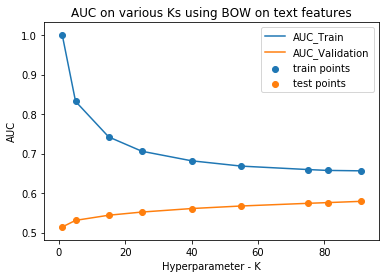

In [56]:
title1 = 'BOW'

C1, auc_tr1, auc_cv1 = getAUC(X_train_merged, y_train)
plotPerformance(C1, auc_tr1, auc_cv1, title1)
optimal_C1 = getOptimal_C(C1,auc_cv1)
print("Optimal Hyperparameter",optimal_C1)
lro1 = train_using_optimal_c(optimal_C1, X_test_merged, y_test)
roc_data_test1, roc_data_train1 , pred_y_test ,pred_y_train = getROCData(X_test_merged, y_test, X_train_merged, y_train, lro1)

AUC score for train data:  0.5643421394517839 and AUC score for test data :  0.6563772072874924


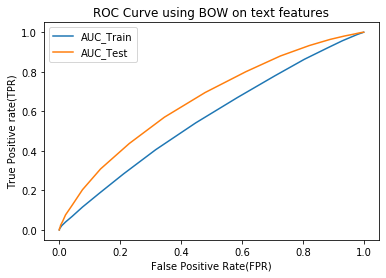

In [57]:
print("AUC score for train data: ",auc(roc_data_train1[0],roc_data_train1[1]),"and AUC score for test data : ",\
      auc(roc_data_test1[0],roc_data_test1[1]))
plotROC(roc_data_test1[0], roc_data_train1[0],roc_data_test1[1], roc_data_train1[1], title1)

Maximum value of tpr*(1-fpr) 0.2987731672157235 for optimal threshold 0.8131868131868132


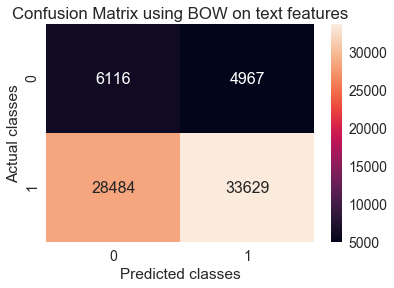

In [58]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train1[2],roc_data_train1[1],roc_data_train1[0], title1)

Maximum value of tpr*(1-fpr) 0.3733064254294637 for optimal threshold 0.8131868131868132


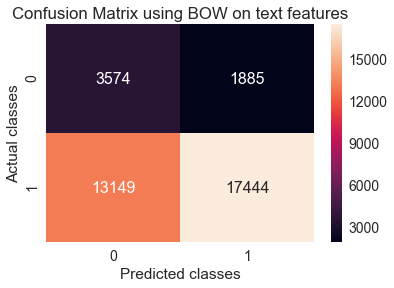

In [59]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test1[2],roc_data_test1[1],roc_data_test1[0], title1)

<span>Set 2: categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)</span>

* ### $2.4.2$ Applying KNN on TFIDF encoding,<font color='yellow'> SET $2$</font>

In [60]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test_merged_tfidf = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, standardized_teacher_no_test, test_title_tfidf, test_essay_tfidf)).tocsr()

print("FINAL DATA MATRIX FOR TFIDF")
print(X_train_merged_tfidf.shape, y_train.shape)
print(X_test_merged_tfidf.shape, y_test.shape)

FINAL DATA MATRIX FOR TFIDF
(73196, 19181) (73196,)
(36052, 19181) (36052,)


Optimal Hyperparameter 91


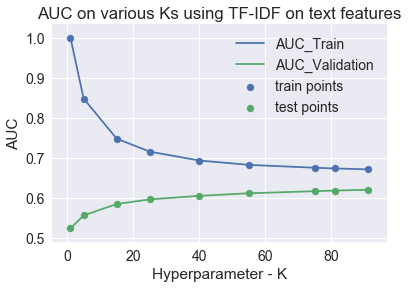

In [61]:
title2 = 'TF-IDF'

C2, auc_tr1, auc_cv1 = getAUC(X_train_merged_tfidf, y_train)
plotPerformance(C2, auc_tr1, auc_cv1, title2)
optimal_C2 = getOptimal_C(C2,auc_cv1)
print("Optimal Hyperparameter",optimal_C2)
lro1 = train_using_optimal_c(optimal_C2, X_test_merged_tfidf, y_test)
roc_data_test2, roc_data_train2 , pred_y_test ,pred_y_train = getROCData(X_test_merged_tfidf, y_test, X_train_merged_tfidf, y_train, lro1)

AUC score for train data:  0.6193311867168124 and AUC score for test data :  0.6642085858257106


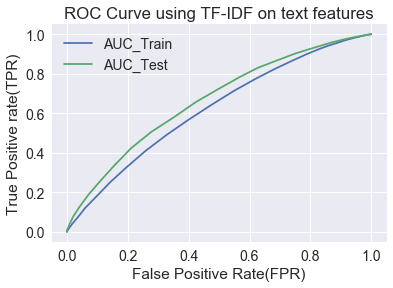

In [62]:
print("AUC score for train data: ",auc(roc_data_train2[0],roc_data_train2[1]),"and AUC score for test data : ",\
      auc(roc_data_test2[0],roc_data_test2[1]))
plotROC(roc_data_test2[0], roc_data_train2[0],roc_data_test2[1], roc_data_train2[1], title2)

Maximum value of tpr*(1-fpr) 0.34084937901923795 for optimal threshold 0.8571428571428571


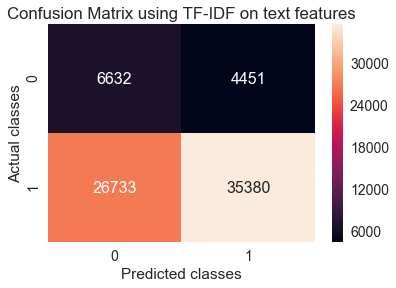

In [63]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train2[2],roc_data_train2[1],roc_data_train2[0], title2)

Maximum value of tpr*(1-fpr) 0.3786266395828821 for optimal threshold 0.8461538461538461


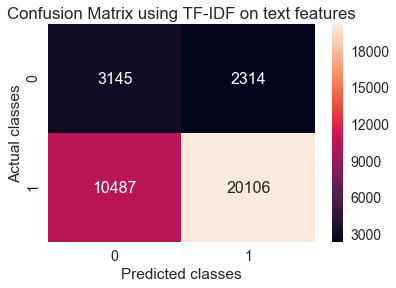

In [64]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test2[2],roc_data_test2[1],roc_data_test2[0], title2)

<span>Set 3: categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V)</span>

* ### $2.4.3$ Applying KNN on W2V encoding,<font color='yellow'> SET $3$</font>

In [50]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train,\
                             grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, \
                             standardized_quantity_train, standardized_teacher_no_train, train_title_avg_w2v, \
                             train_essay_avg_w2v)).tocsr()
X_test_merged_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test,\
                            teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test,\
                            standardized_teacher_no_test, test_title_avg_w2v, test_essay_avg_w2v)).tocsr()

X_cv_merged_w2v = hstack((cat_one_hot_cv, sub_cat_one_hot_cv, school_state_one_hot_cv, grade_one_hot_cv,\
                            teacher_prefix_one_hot_cv, standardized_price_cv, standardized_quantity_cv,\
                            standardized_teacher_no_cv, cv_title_avg_w2v, cv_essay_avg_w2v)).tocsr()

print("FINAL DATA MATRIX FOR AVG W2V")
print(X_train_merged_w2v.shape, y_train.shape)
print(X_test_merged_w2v.shape, y_test.shape)
print(X_cv_merged_w2v.shape, y_cv.shape)

FINAL DATA MATRIX FOR AVG W2V
(49041, 703) (49041,)
(36052, 703) (36052,)
(24155, 703) (24155,)


100%|███████████████████████████████████████| 8/8 [14:01:50<00:00, 6313.80s/it]


Optimal Hyperparameter 91


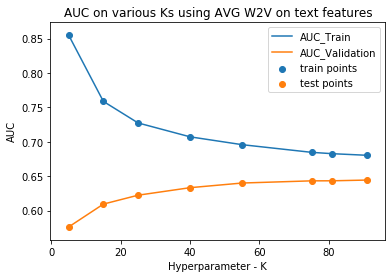

In [51]:
title3 = 'AVG W2V'

C3, auc_cv1, auc_tr1 = getAUC_normal(X_train_merged_w2v, y_train, X_cv_merged_w2v , y_cv)
plotPerformance(C3, auc_tr1, auc_cv1, title3)
optimal_C3 = getOptimal_C(C3,auc_cv1)
print("Optimal Hyperparameter",optimal_C3)
lro1 = train_using_optimal_c(optimal_C3, X_test_merged_w2v, y_test)
roc_data_test3, roc_data_train3 , pred_y_test ,pred_y_train = getROCData(X_test_merged_w2v, y_test, X_train_merged_w2v, y_train, lro1)

AUC score for train data:  0.6301965835427473 and AUC score for test data :  0.6745757384680696


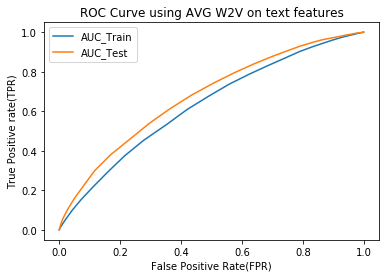

In [52]:
print("AUC score for train data: ",auc(roc_data_train3[0],roc_data_train3[1]),"and AUC score for test data : ",\
      auc(roc_data_test3[0],roc_data_test3[1]))
plotROC(roc_data_test3[0], roc_data_train3[0],roc_data_test3[1], roc_data_train3[1], title3)

Maximum value of tpr*(1-fpr) 0.3533792201279222 for optimal threshold 0.8571428571428571


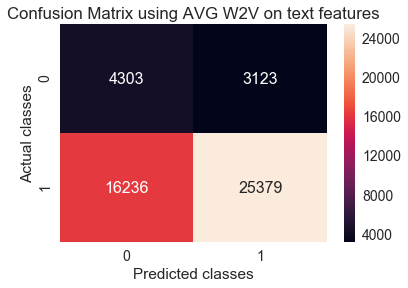

In [53]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train3[2],roc_data_train3[1],roc_data_train3[0], title3)

Maximum value of tpr*(1-fpr) 0.39011731273576866 for optimal threshold 0.8571428571428571


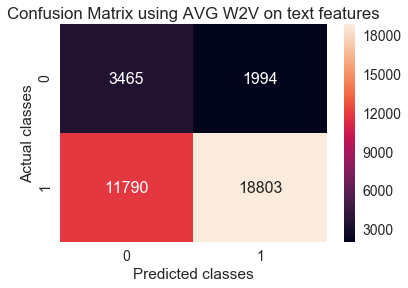

In [54]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test3[2],roc_data_test3[1],roc_data_test3[0], title3)

<span>Set 4: categorical, numerical features + project_title(TFIDF weighted W2V) + preprocessed_essay (TFIDF weighted W2V)</span>

* ### $2.4.4$ Applying KNN on TFIDF weighted W2V encoding,<font color='yellow'> SET $4$</font>

In [55]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merged_tfidf_w2v = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train, standardized_teacher_no_train, train_title_tfidf_w2v, train_essay_tfidf_w2v)).tocsr()
X_test_merged_tfidf_w2v = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test,\
                                  teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test, \
                                  standardized_teacher_no_test, test_title_tfidf_w2v, test_essay_tfidf_w2v)).tocsr()
X_cv_merged_tfidf_w2v = hstack((cat_one_hot_cv, sub_cat_one_hot_cv, school_state_one_hot_cv, grade_one_hot_cv,\
                                  teacher_prefix_one_hot_cv, standardized_price_cv, standardized_quantity_cv, \
                                  standardized_teacher_no_cv, cv_title_tfidf_w2v, cv_essay_tfidf_w2v)).tocsr()

print("FINAL DATA MATRIX FOR TFIDF WEIGHTED W2V")
print(X_train_merged_tfidf_w2v.shape, y_train.shape)
print(X_test_merged_tfidf_w2v.shape, y_test.shape)
print(X_cv_merged_tfidf_w2v.shape, y_cv.shape)

FINAL DATA MATRIX FOR TFIDF WEIGHTED W2V
(49041, 703) (49041,)
(36052, 703) (36052,)
(24155, 703) (24155,)


100%|███████████████████████████████████████| 8/8 [10:20:20<00:00, 4652.62s/it]


Optimal Hyperparameter 5


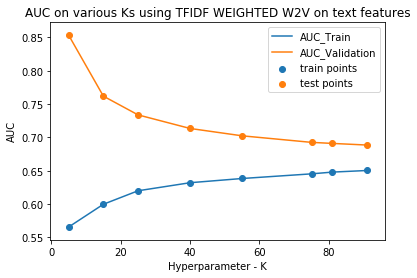

In [56]:
title4 = 'TFIDF WEIGHTED W2V'

C4, auc_tr1, auc_cv1 = getAUC_normal(X_train_merged_tfidf_w2v, y_train, X_cv_merged_tfidf_w2v, y_cv)
plotPerformance(C4, auc_tr1, auc_cv1, title4)
optimal_C4 = getOptimal_C(C4,auc_cv1)
print("Optimal Hyperparameter",optimal_C4)
lro1 = train_using_optimal_c(optimal_C4, X_test_merged_tfidf_w2v, y_test)
roc_data_test4, roc_data_train4 , pred_y_test ,pred_y_train = getROCData(X_test_merged_tfidf_w2v, y_test,\
                                                                         X_train_merged_tfidf_w2v, y_train, lro1)

AUC score for train data:  0.5664991931767542 and AUC score for test data :  0.855153712636331


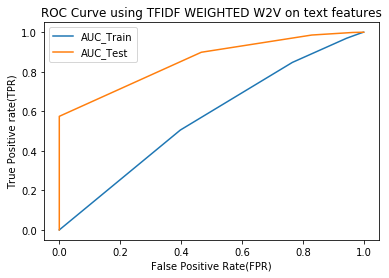

In [57]:
print("AUC score for train data: ",auc(roc_data_train4[0],roc_data_train4[1]),"and AUC score for test data : ",\
      auc(roc_data_test4[0],roc_data_test4[1]))
plotROC(roc_data_test4[0], roc_data_train4[0],roc_data_test4[1], roc_data_train4[1], title4)

Maximum value of tpr*(1-fpr) 0.30429074578736726 for optimal threshold 1.0


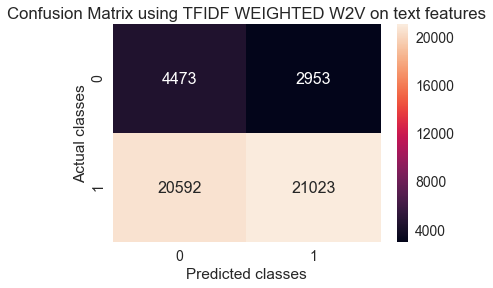

In [58]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train4[2],roc_data_train4[1],roc_data_train4[0], title4)

Maximum value of tpr*(1-fpr) 0.574608570588043 for optimal threshold 1.0


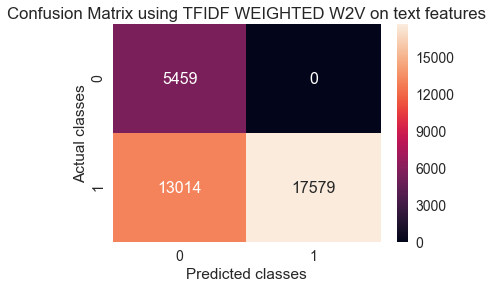

In [59]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test4[2],roc_data_test4[1],roc_data_test4[0], title4)

<h2> 3. Select top 2000 features from feature Set 2 using SelectKBest and then apply KNN on top of these features <h2>

In [60]:
from scipy.sparse import hstack
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [61]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_train_merged_Kbest = hstack((cat_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, grade_one_hot_train, \
                               teacher_prefix_one_hot_train, standardized_price_train, standardized_quantity_train,\
                               standardized_teacher_no_train, train_title_tfidf, train_essay_tfidf)).tocsr()
X_test_merged_Kbest = hstack((cat_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, grade_one_hot_test, \
                              teacher_prefix_one_hot_test, standardized_price_test, standardized_quantity_test,\
                              standardized_teacher_no_test, test_title_tfidf, test_essay_tfidf)).tocsr()
X_cv_merged_Kbest = hstack((cat_one_hot_cv, sub_cat_one_hot_cv, school_state_one_hot_cv, grade_one_hot_cv, \
                              teacher_prefix_one_hot_cv, standardized_price_cv, standardized_quantity_cv,\
                              standardized_teacher_no_cv, cv_title_tfidf, cv_essay_tfidf)).tocsr()

print("FINAL DATA MATRIX FOR KNN USING KBEST Features")
print(X_train_merged_Kbest.shape, y_train.shape)
print(X_test_merged_Kbest.shape, y_test.shape)
print(X_cv_merged_Kbest.shape, y_test.shape)


selectFunction = SelectKBest(f_classif , k=2000).fit(X_train_merged_Kbest , y_train)

X_train_2000 = selectFunction.transform(X_train_merged_Kbest)
X_test_2000 = selectFunction.transform(X_test_merged_Kbest)
X_cv_2000 = selectFunction.transform(X_cv_merged_Kbest)

print("FINAL DATA MATRIX for SelectKBest")
print(X_train_2000.shape, y_train.shape)
print(X_cv_2000.shape, y_test.shape)
print(X_test_2000.shape, y_cv.shape)

FINAL DATA MATRIX FOR KNN USING KBEST Features
(49041, 16787) (49041,)
(36052, 16787) (36052,)
(24155, 16787) (36052,)


C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] are constant.
  UserWarning)


FINAL DATA MATRIX for SelectKBest
(49041, 2000) (49041,)
(24155, 2000) (36052,)
(36052, 2000) (24155,)


$l1$ Regulization

100%|███████████████████████████████████████████| 8/8 [26:17<00:00, 197.22s/it]


Optimal Hyperparameter K:  5


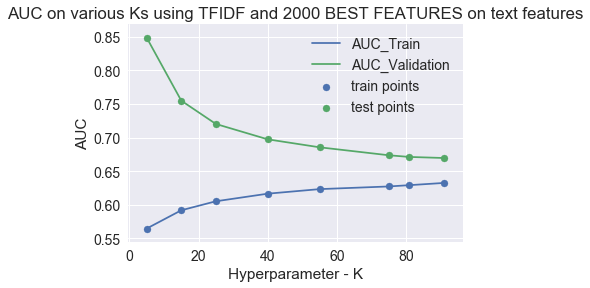

In [62]:
title4 = 'TFIDF and 2000 BEST FEATURES'

K, auc_tr1, auc_cv1 = getAUC_normal(X_train_2000, y_train,X_cv_2000,y_cv)
plotPerformance(K, auc_tr1, auc_cv1, title2)
optimal_K = getOptimal_C(K,auc_cv1)
print("Optimal Hyperparameter K: ",optimal_K)
lro1 = train_using_optimal_c(optimal_K, X_test_2000, y_test)
roc_data_test2, roc_data_train2 , pred_y_test ,pred_y_train = getROCData(X_test_2000, y_test, X_train_2000, y_train, lro1)

AUC score for train data:  0.5697462833984164 and AUC score for test data :  0.8371112406078668


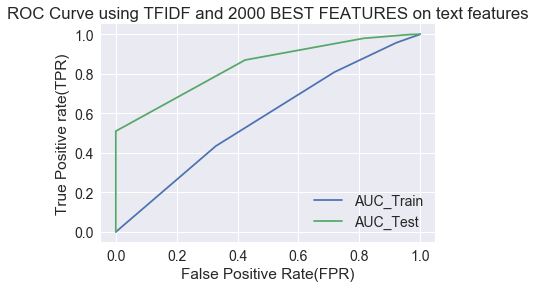

In [64]:
print("AUC score for train data: ",auc(roc_data_train2[0],roc_data_train2[1]),"and AUC score for test data : ",\
      auc(roc_data_test2[0],roc_data_test2[1]))
plotROC(roc_data_test2[0], roc_data_train2[0],roc_data_test2[1], roc_data_train2[1],title2)

Maximum value of tpr*(1-fpr) 0.2916034627888757 for optimal threshold 1.0


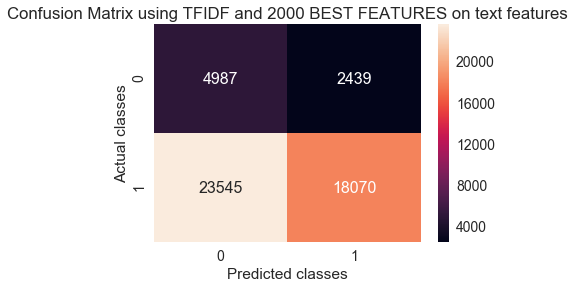

In [66]:
getConfusionMatrix(y_train,pred_y_train,roc_data_train2[2],roc_data_train2[1],roc_data_train2[0],title2)

Maximum value of tpr*(1-fpr) 0.5098225084169581 for optimal threshold 1.0


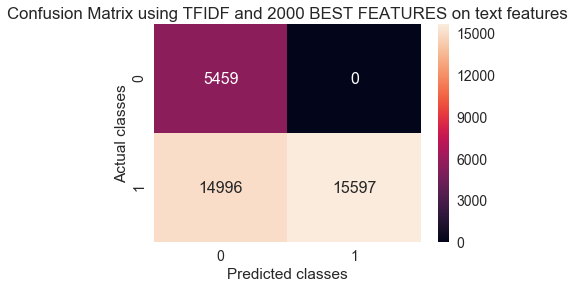

In [67]:
getConfusionMatrix(y_test,pred_y_test,roc_data_test2[2],roc_data_test2[1],roc_data_test2[0],title2)

In [57]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Vectorizer", "Hyper Parameter" ,"AUC(test)","AUC(train)"]

table.add_row(["BOW", "91","0.5643421394517839","0.6563772072874924"])
table.add_row(["TFIDF", "91","0.6193311867168124","0.6642085858257106" ])
table.add_row(["AVG W2V", "91","0.6301965835427473","0.6745757384680696"])
table.add_row(["TFIDF W2V", "5" ,"0.5664991931767542","0.855153712636331"])
table.add_row(["K-best TFIDF", "5","0.5697462833984164","0.8371112406078668" ])

print (table)

+--------------+-----------------+--------------------+--------------------+
|  Vectorizer  | Hyper Parameter |     AUC(test)      |     AUC(train)     |
+--------------+-----------------+--------------------+--------------------+
|     BOW      |        91       | 0.5643421394517839 | 0.6563772072874924 |
|    TFIDF     |        91       | 0.6193311867168124 | 0.6642085858257106 |
|   AVG W2V    |        91       | 0.6301965835427473 | 0.6745757384680696 |
|  TFIDF W2V   |        5        | 0.5664991931767542 | 0.855153712636331  |
| K-best TFIDF |        5        | 0.5697462833984164 | 0.8371112406078668 |
+--------------+-----------------+--------------------+--------------------+


$Observations and Conclusions$

1. The KNN model gives similar AUC scores for BOW ,tfidf and average W2V encodings<br>
2. For the new features set,  the KNN model gives the best AUC scores(test) among the rest.owever the difference between train and test AUC is too high.
